In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
df.head()
# As we can see that the dataset has 140 columns which represent the ECG readings
# and a labels column which has been encoded to 0 or 1 showing whether the ECG is abnormal or normal

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [11]:
#Now we will separate the data and labels so that it will be easy for us
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
print(labels)
print(data)

[1. 1. 1. ... 0. 0. 0.]
[[-0.11252183 -2.8272038  -3.7738969  ...  0.12343082  0.92528624
   0.19313742]
 [-1.1008778  -3.9968398  -4.2858426  ...  0.77381971  1.1196209
  -1.4362499 ]
 [-0.56708802 -2.5934502  -3.8742297  ...  0.32109663  0.90422673
  -0.42179659]
 ...
 [-1.1229693  -2.2529248  -2.8676281  ... -2.874136   -2.0083694
  -1.8083338 ]
 [-0.54770461 -1.8895451  -2.8397786  ...  1.261335    1.1504486
   0.80493225]
 [-1.3517791  -2.2090058  -2.5202247  ... -2.2600228  -1.577823
  -0.68453092]]


In [16]:
# splitting data into train and test data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

# Lets normalize the data to the range [0-1]
# x_norm = (x-min(x))/(max(x)-min(x))
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)
train_data = (train_data-min)/(max-min)
test_data = (test_data-min)/(max-min)

# conversion of data into float
train_data = tf.cast(train_data,  dtype=tf.float32)
test_data = tf.cast(test_data,dtype=tf.float32)
print(train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(3998, 140), dtype=float32)


In [17]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false)
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


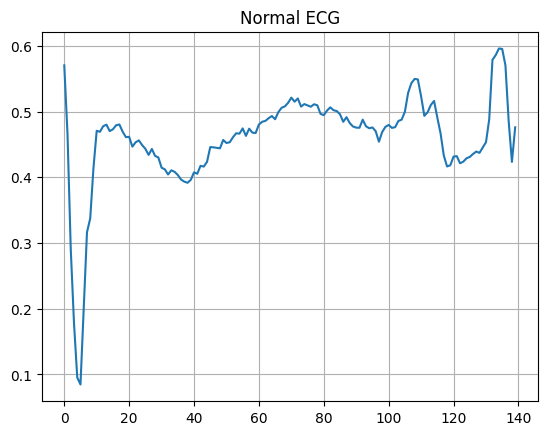

In [18]:
#Lets plot a normal ECG
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal ECG')
plt.show()

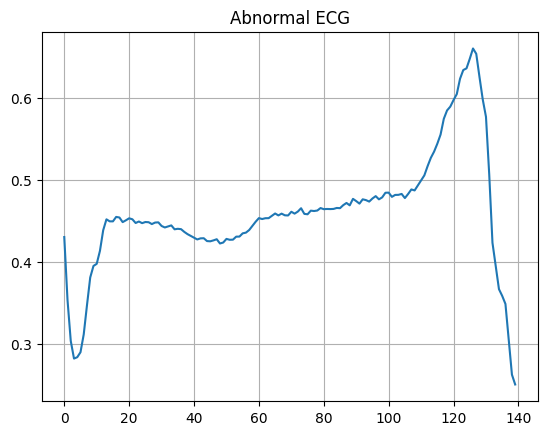

In [21]:
#Lets plot one from abnormal ECG
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

This model uses an Autoencoder architecture for anomaly detection

Autoencoders are a specific type of feedforward neural network.It compresess the input into a so-called "code" of lower dimensionality and then tries to reconstruct the output from this code.It is an unsupervised learning model.

It consists of two parts:- 1.Encoder 2.Decoder

So how the model will detect anomaly ?

We will create an encoder and a decoder using an ANN architecture.We are going to provide the ECG data as input and the model will try to reconstruct it. The error between the original data and reconstructed output will be called the reconstruction error.Based on this recostruction error we are going to classify an ECG as anomalous or not.In order to do this we are going to train the model only on the normal ECG data but it will be tested on the full test set, so that when an abnormal ECG is provided in the input the autoencoder will try to reconstruct it but since it has been only trained on normal ECG data the output will have a larger reconstruction error. We will also define a minimum threshold for the error i.e. if the reconstruction error is above the threshold then it will be categorised as anomalous.

Before we make the model another thing that I want to clarify is that I will be using the Subclassing API of keras for making the model. In keras there are mainly 3 APIs for defining a model :- **1.Sequential API 2.Functional API 3.Subclassing API

The reason I used Subclassing API is that it provides a good control over the model as compared to Sequential API because in sequential API the add funcion implicitly passes the output of one layer into the next and u just get the output from the final layer but in case of subclassing API the forward pass is explicitly defined as you can see in the call() function. For this problem this api suits best.

The subclassing api is used to create a model class called detector(in this case) it inherits from the Model class of keras from which both sequential model and functional api also inherit. First using super() we pass the parameters to the parent class then we define out constructor which has the encoder and decoder. Then we implement the forward pass in the call() function.

In [27]:
#Now let's define the model!
#Here I have used the Model Subclassing API (but we can also use the Sequential API)
#The model has 2 parts : 1. Encoder and 2. Decoder
class detector(Model):
    def __init__(self):
      super(detector,self).__init__()
      #  rectified linear unit (ReLU) is an activation function that introduces
      # the property of non-linearity to a deep learning model and solves the vanishing gradients issue
      self.encoder = tf.keras.Sequential([
          layers.Dense(32,activation='relu'),
          layers.Dense(16,activation='relu'),
          layers.Dense(8,activation='relu'),
      ])
      self.decoder = tf.keras.Sequential([
          layers.Dense(16,activation = 'relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(140,activation='sigmoid')
      ])
    def call(self,x):
      encoded=self.encoder(x)
      decoded=self.decoder(encoded)
      return decoded

# See that in fit() both the data are same i.e. n_train_data, the reason is that we will be comparing the original ECG with the reconstructed one to calculate the reconstruction error.
# Autoencoders are unsupervised learning models but here we are training them using supervised method so its more like they are used as self-supervised.

In [30]:
# Let's compiler and train the model
# A loss function measures the difference between the predicted output of a model and the actual output,
# while an optimizer adjusts the model's parameters to minimize the loss function
autoencoder = detector()
autoencoder.compile(optimizer ='adam',loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))
data = (n_test_data,n_test_data)

Epoch 1/20
5/5 [==============================] - 1s 52ms/step - loss: 0.0581 - val_loss: 0.0570
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0565 - val_loss: 0.0554
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0547 - val_loss: 0.0532
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0522 - val_loss: 0.0502
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0489 - val_loss: 0.0464
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0449 - val_loss: 0.0422
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0408 - val_loss: 0.0383
Epoch 8/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0370 - val_loss: 0.0348
Epoch 9/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0337 - val_loss: 0.0317
Epoch 10/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0309 - val_loss: 0.0295
Epoch 11/20
5/5 [============

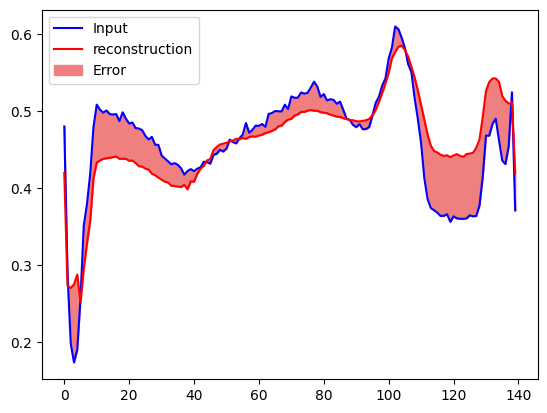

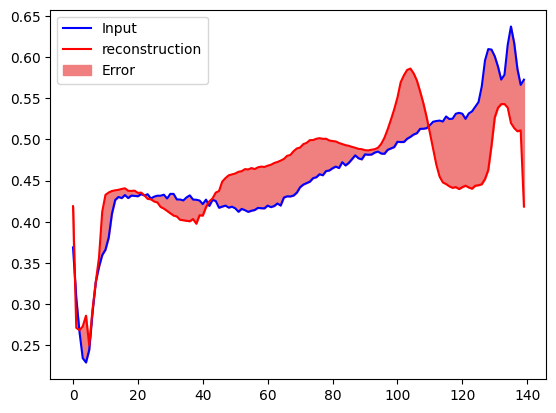

In [34]:
# Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n],'b')
  plt.plot(dec_img[n],'r')
  plt.fill_between(np.arange(140),data[n],dec_img[n],color='lightcoral')
  plt.legend(labels=['Input','reconstruction','Error'])
  plt.show()

plot(n_test_data,0)
plot(an_test_data,0)

In [37]:
# Threshold for anamoly is mean of normal training data
reconstructed = autoencoder(n_train_data)
train_loss =losses.mae(reconstructed,n_train_data)
t=np.mean(train_loss)+np.std(train_loss)
def prediction(model,data,threshold):
  rec=model(data)
  loss = losses.mae(rec,data)
  return tf.math.less(loss,threshold)
print(t)

0.034099452


In [39]:
pred = prediction(autoencoder, n_test_data, t)
print(pred)

tf.Tensor(
[False  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  Tr

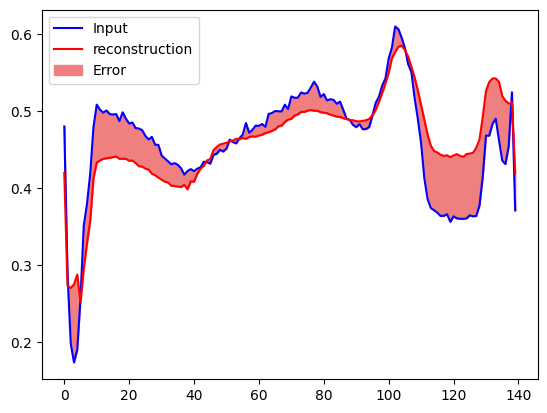

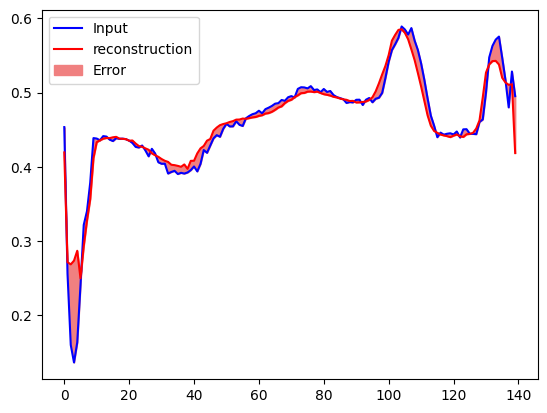

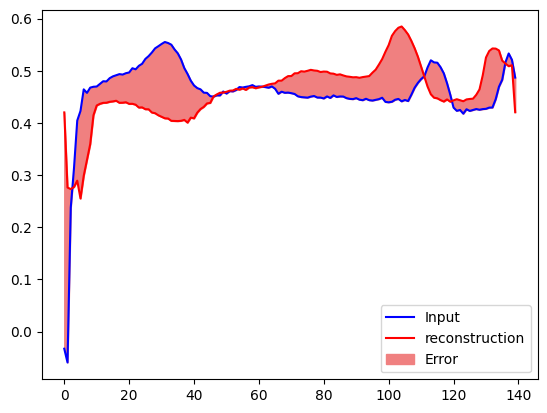

In [40]:
#Lets see some more result visually !!
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 3)